In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
df.describe(include=['O'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [10]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df.describe(include=['float64'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
# let's impute the missing values using the median value
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)

In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
# let's check for duplicates
df.duplicated().sum()

0

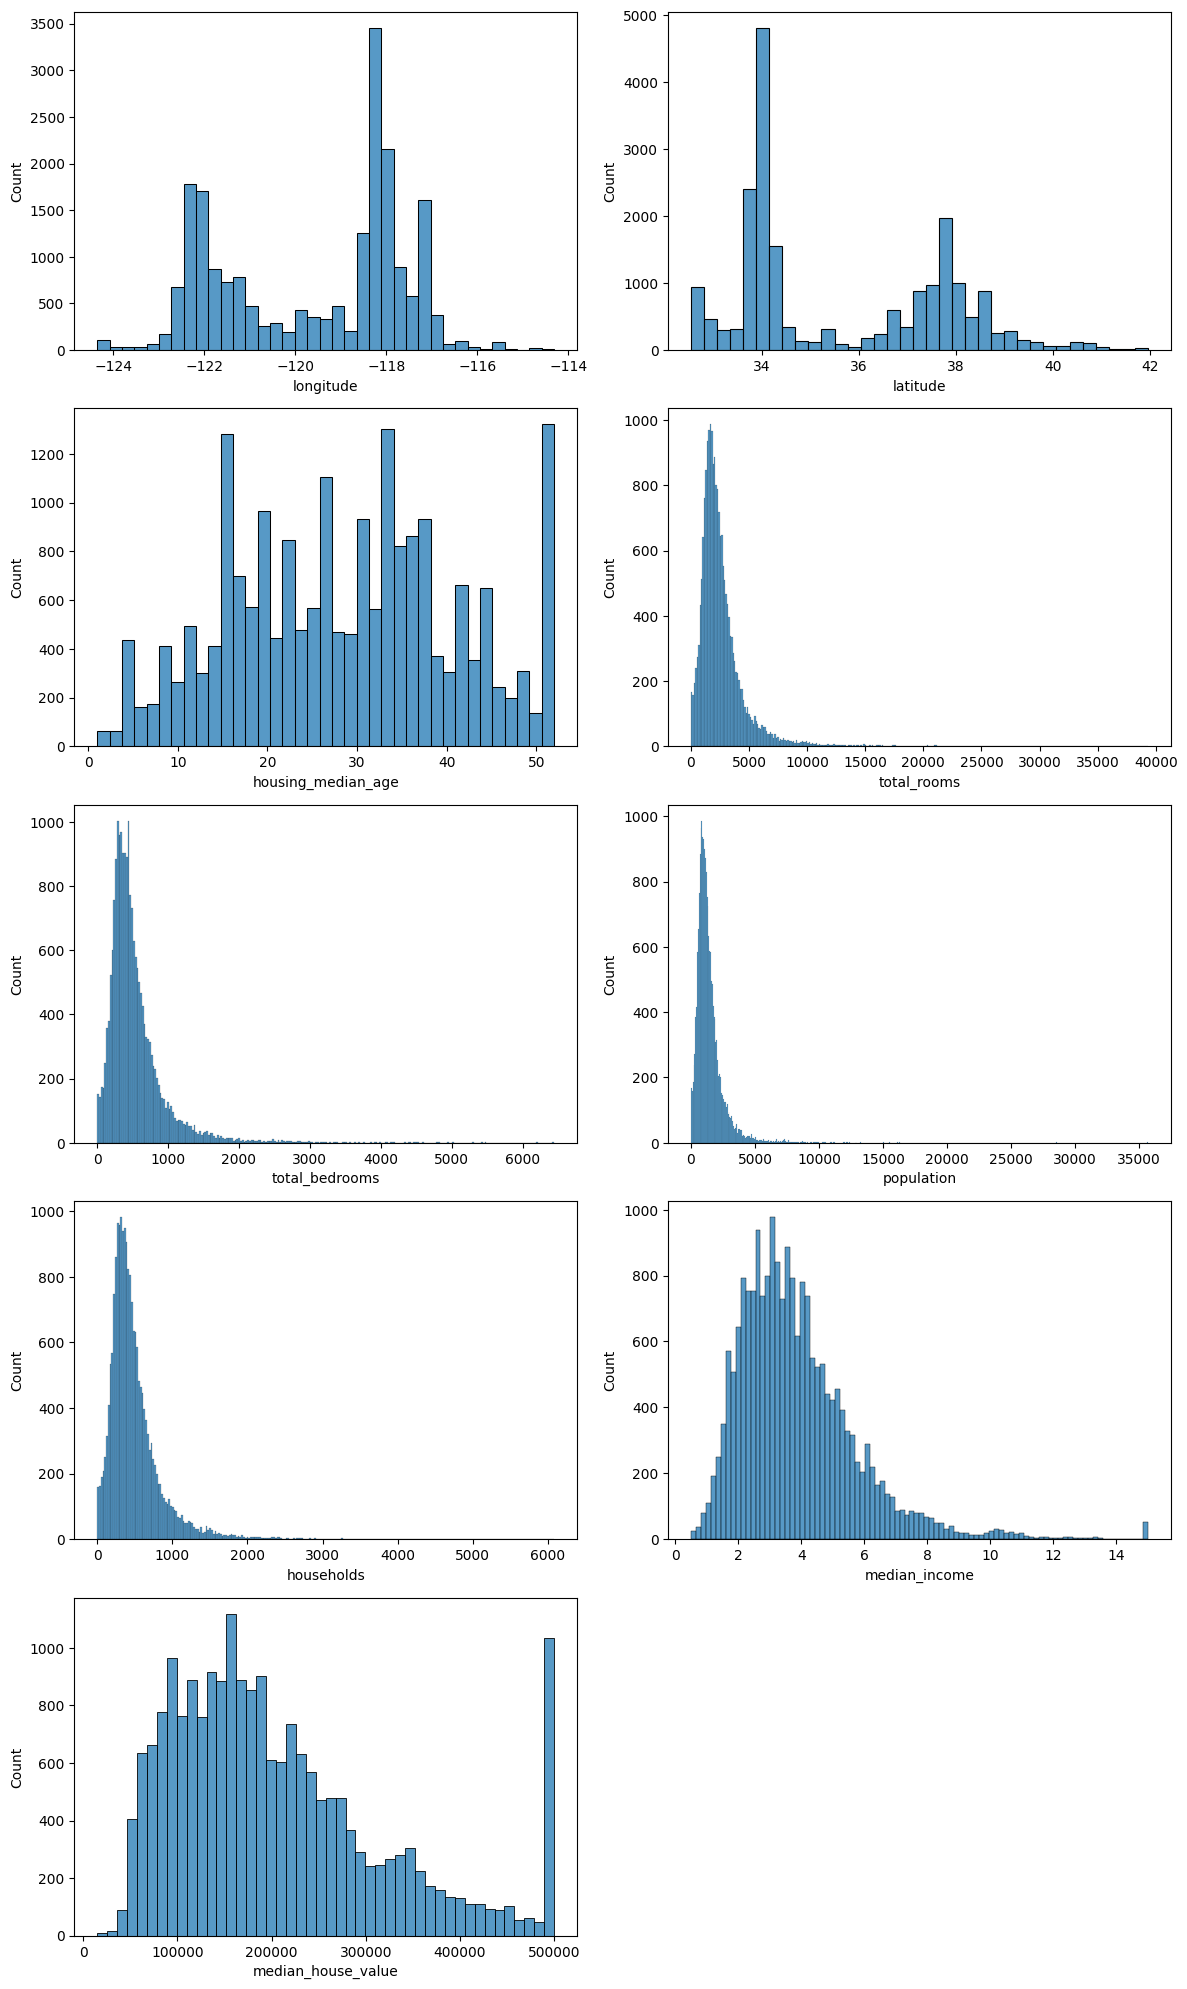

In [16]:
# let's check for outliers
# we'll plot boxplots for the following columns: median_house_value, housing_median_age, total_rooms, total_bedrooms, population, households, median_income
import matplotlib.pyplot as plt
import seaborn as sns

# Select only float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Compute the layout of subplots
n = len(float_cols)
ncols = 2  # You can adjust this as needed
nrows = n // ncols + (n % ncols > 0)

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(12, nrows*4))

# Flatten the axes array if there is more than one row
axs = axs.flatten()

for i, col in enumerate(float_cols):
    sns.histplot(data=df, x=col, ax=axs[i])

# Remove unused subplots
for i in range(n, nrows*ncols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

<Axes: >

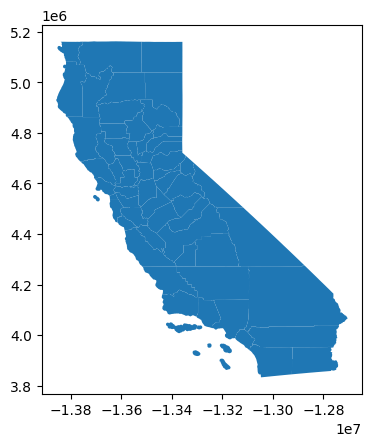

In [17]:
cali = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')
cali.plot()

In [18]:
# Load the California shapefile
cali = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')

# Create the GeoDataFrame for your points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs=cali.crs)

print(cali.crs == gdf.crs, '\n', cali.crs, '\n', gdf.crs)

True 
 epsg:3857 
 epsg:3857


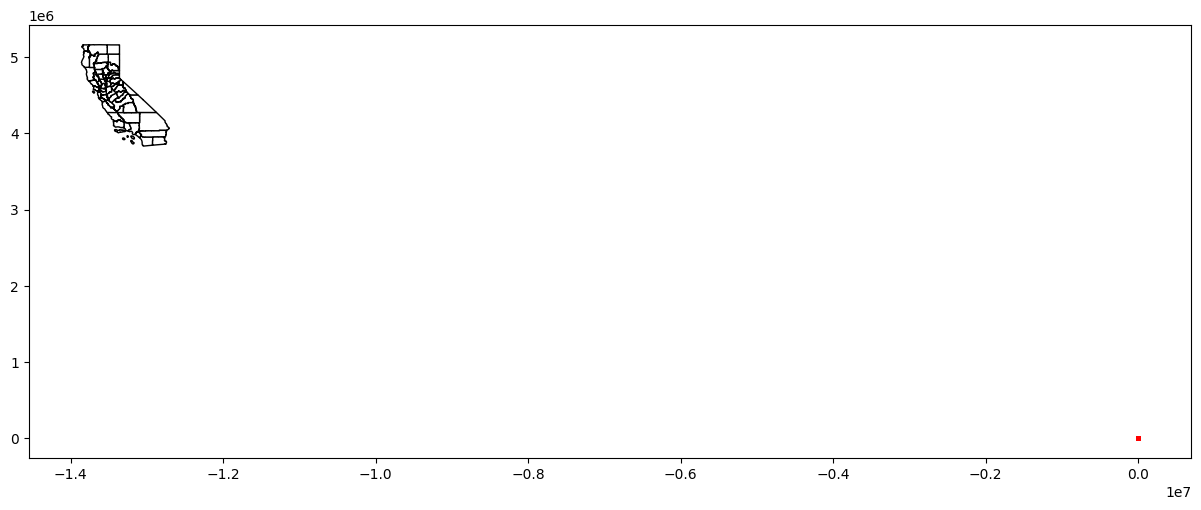

In [19]:
# Load the California shapefile
cali = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')

# Create the GeoDataFrame for your points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs=cali.crs)

# Set the CRS of the points GeoDataFrame to match the CRS of the California GeoDataFrame
gdf.set_crs(cali.crs, inplace=True)

# If the CRSs are different, you might need to use the to_crs function to convert the points to the same CRS
# gdf = gdf.to_crs(cali.crs)

# Now, the points should be in the correct place when plotted
fig, ax = plt.subplots(figsize=(15,10))
cali.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(marker='o', color='red', markersize=5, ax=ax)
plt.show()



<Axes: >

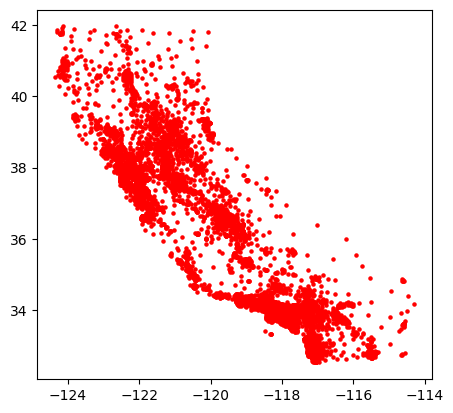

In [20]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf[['geometry']]
# gdf.crs
# gdf.head()
gdf.plot(marker='o', color='red', markersize=5, ax=plt.gca())

In [21]:
# Load the California shapefile
cali = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')
cali.head()


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [22]:
cali['geometry'].head()

0    POLYGON ((-13431319.751 4821511.426, -13431312...
1    POLYGON ((-13490651.476 4680831.603, -13490511...
2    MULTIPOLYGON (((-13423116.772 4042044.149, -13...
3    POLYGON ((-13428575.483 4627725.228, -13428534...
4    MULTIPOLYGON (((-13317853.594 3931602.414, -13...
Name: geometry, dtype: geometry

<Axes: >

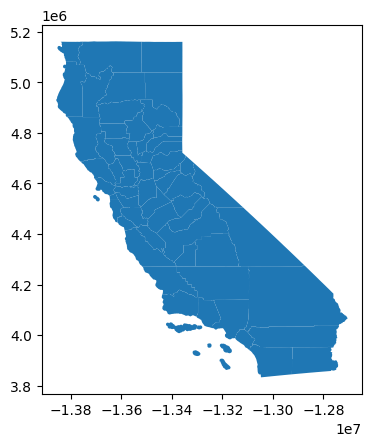

In [23]:
cali['geometry'].plot()

In [24]:
gdf.columns

Index(['geometry'], dtype='object')

In [25]:
import geopandas as gpd
from shapely.geometry import Point
from pyproj import Transformer

# Create a transformer object for transforming from EPSG:4326 to EPSG:3857
# transformer = Transformer.from_crs('epsg:4326', 'epsg:3857')
transformer = Transformer.from_crs('epsg:3857', 'epsg:4326')

# Function to transform coordinates
def transform_coordinates(point):
    x, y = transformer.transform(point.y, point.x)
    return pd.Series([x, y])

# Apply the function
gdf[['x', 'y']] = gdf['geometry'].apply(transform_coordinates)

print(gdf.head())


                  geometry         x        y
0  POINT (-122.230 37.880) -0.001098  0.00034
1  POINT (-122.220 37.860) -0.001098  0.00034
2  POINT (-122.240 37.850) -0.001098  0.00034
3  POINT (-122.250 37.850) -0.001098  0.00034
4  POINT (-122.250 37.850) -0.001098  0.00034


In [26]:
# let's check for outliers

<Axes: >

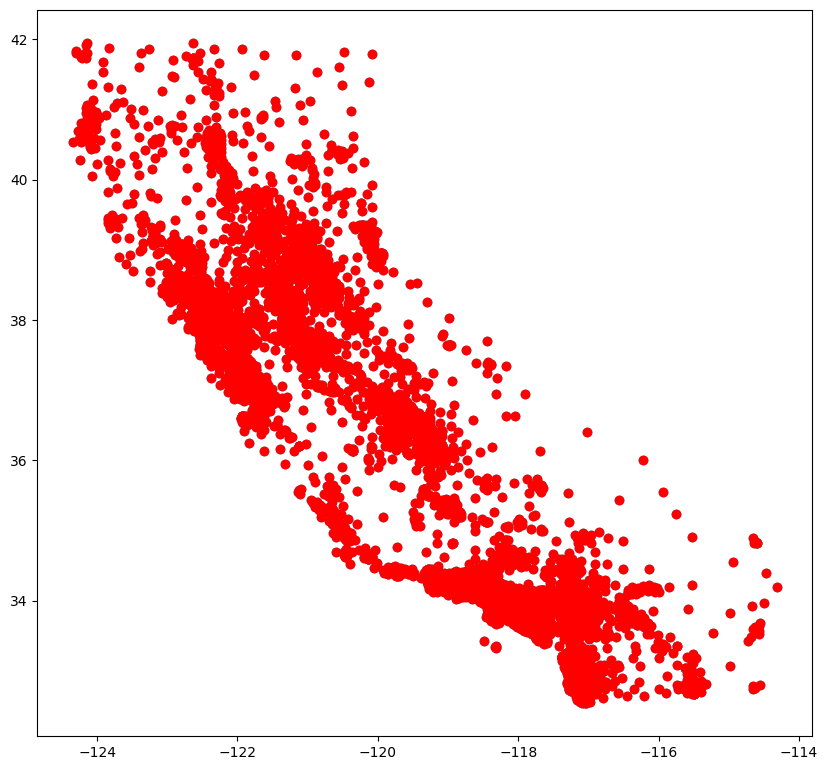

In [27]:
import geopandas as gpd
from pyproj import CRS, Transformer
from shapely.geometry import Point

# Assuming df is your DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:3857')

# Coordinate of point (longitude, latitude)
coord = (-122.23, 37.88)

# Create a transformer to convert from EPSG:4326 to EPSG:3857
transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3857')

# Transform the point to the CRS of the polygons
coord_transformed = transformer.transform(*coord)

# Create a GeoDataFrame for the point
# point_gdf = gpd.GeoDataFrame(geometry=[Point(coord_transformed)], crs='EPSG:3857')
point_gdf = gpd.GeoDataFrame(geometry=gdf['geometry'], crs='EPSG:3857')

# Plotting
ax = gdf.plot(figsize=(10, 10))
# ax = cali.plot(figsize=(10, 10))
point_gdf.plot(ax=ax, color='red')


In [28]:
# Load the California shapefile
# cali = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')
cali = gpd.read_file('CA_Counties\CA_Counties_TIGER2016.shp')
cali = cali.to_crs("EPSG:4326")

# Create the GeoDataFrame for your points
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs=cali.crs)
gdf = gdf.to_crs("EPSG:4326")

In [29]:
cali['geometry'].head()

0    POLYGON ((-120.65560 39.69357, -120.65554 39.6...
1    POLYGON ((-121.18858 38.71431, -121.18732 38.7...
2    MULTIPOLYGON (((-120.58191 34.09856, -120.5822...
3    POLYGON ((-120.63095 38.34111, -120.63058 38.3...
4    MULTIPOLYGON (((-119.63631 33.27304, -119.6360...
Name: geometry, dtype: geometry

In [30]:
gdf['geometry'].head()

0    POINT (-122.23000 37.88000)
1    POINT (-122.22000 37.86000)
2    POINT (-122.24000 37.85000)
3    POINT (-122.25000 37.85000)
4    POINT (-122.25000 37.85000)
Name: geometry, dtype: geometry

<Axes: >

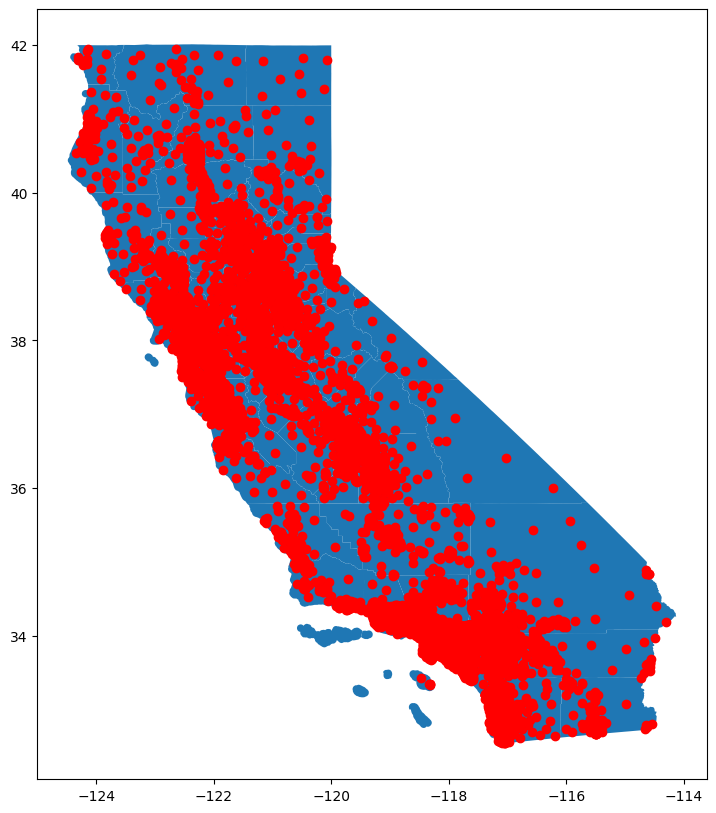

In [31]:
# Plotting
ax = cali.plot(figsize=(10, 10))
# ax = cali.plot(figsize=(10, 10))
gdf.plot(ax=ax, color='red')

<Axes: >

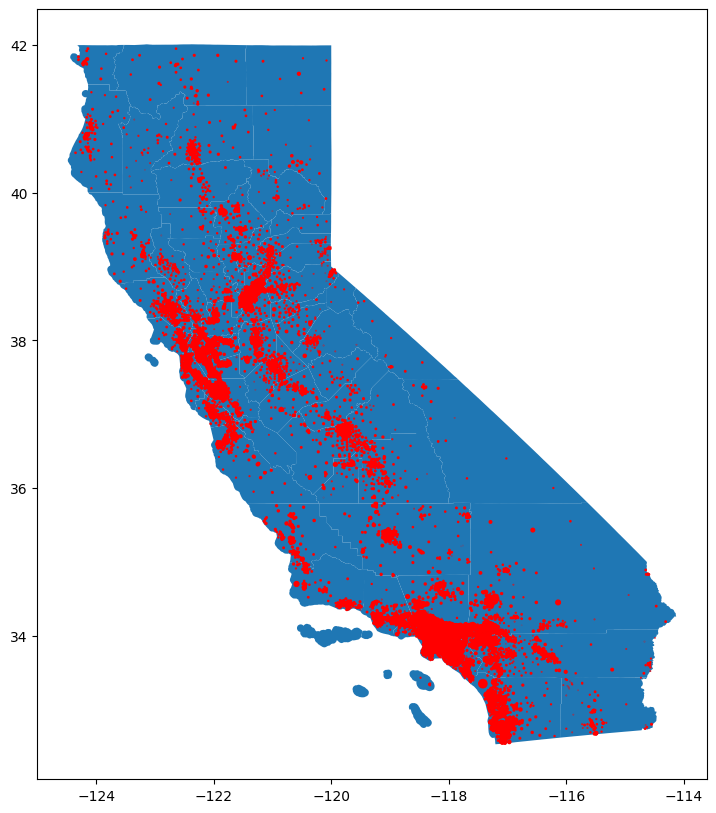

In [32]:
# let's make the dot size proportional to the population
# Plotting
ax = cali.plot(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=gdf['population']/1000)

In [33]:
cali.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65560 39.69357, -120.65554 39.6..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-120.58191 34.09856, -120.5822..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-120.63095 38.34111, -120.63058 38.3..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-119.63631 33.27304, -119.6360..."


In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


In [35]:
gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


In [36]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


In [38]:
gdf['rooms_per_person'] = gdf['total_rooms'] / gdf['population']
gdf['bedrooms_per_household'] = gdf['total_bedrooms'] / gdf['households']
gdf['population_per_household'] = gdf['population'] / gdf['households']
# gdf['median_income'] is in 10,000s of dollars
gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry,rooms_per_person,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000),2.732919,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000),2.956685,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000),2.957661,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000),2.283154,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000),2.879646,1.081081,2.181467


In [39]:
gdf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.976970,1.100910,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.146020,0.519159,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.002547,0.121204,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.522382,1.005525,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.937936,1.048860,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.296090,1.100015,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,55.222222,34.066667,1243.333333


<Axes: xlabel='longitude', ylabel='latitude'>

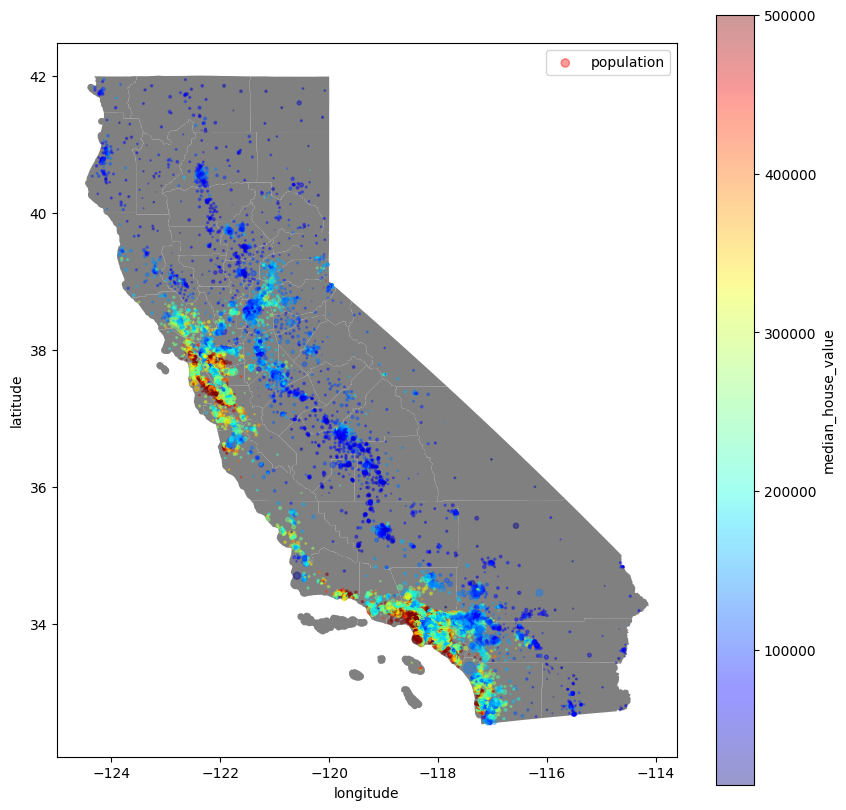

In [40]:
ax = cali.plot(figsize=(10, 10), color='grey')

gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4, s=gdf['population']/500, label='population', figsize=(10,10), 
                        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


<Axes: xlabel='longitude', ylabel='latitude'>

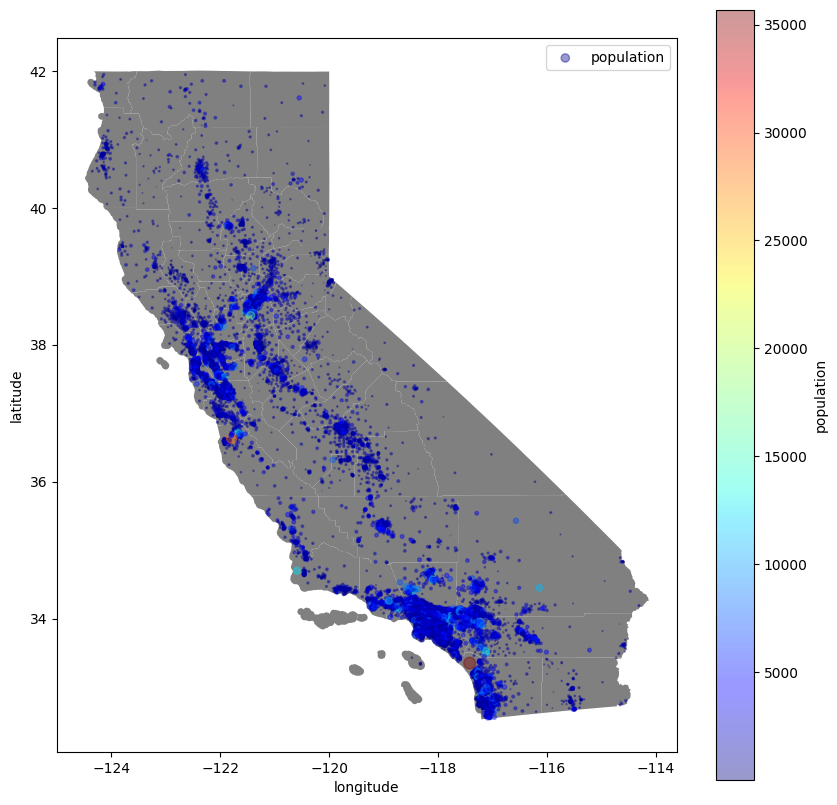

In [41]:
ax = cali.plot(figsize=(10, 10), color='grey')

gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4, s=gdf['population']/500, label='population', figsize=(10,10), 
                        c='population', cmap=plt.get_cmap('jet'), colorbar=True)

<Axes: xlabel='longitude', ylabel='latitude'>

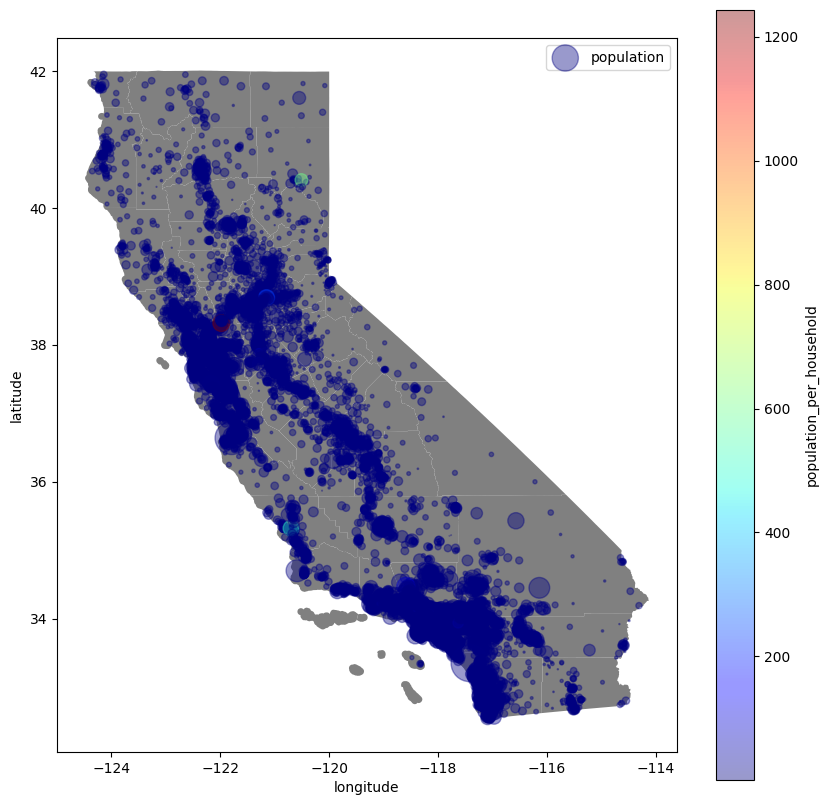

In [42]:
ax = cali.plot(figsize=(10, 10), color='grey')

gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4, s=gdf['population']/50, label='population', figsize=(10,10), 
                        c='population_per_household', cmap=plt.get_cmap('jet'), colorbar=True)

<Axes: xlabel='longitude', ylabel='latitude'>

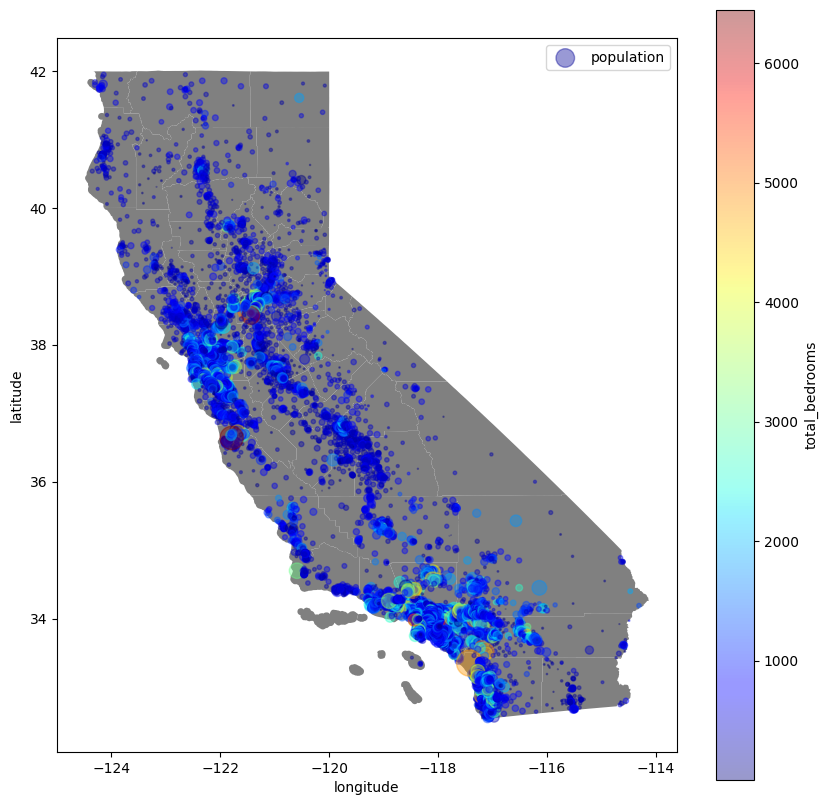

In [43]:
ax = cali.plot(figsize=(10, 10), color='grey')

gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.4, s=gdf['population']/100, label='population', figsize=(10,10), 
                        c='total_bedrooms', cmap=plt.get_cmap('jet'), colorbar=True)

In [46]:
# auxiliary csv files
cal_cities = pd.read_csv('cal_cities_lat_long.csv')
cal_pops_cities = pd.read_csv('cal_populations_city.csv')
cal_pops_counties = pd.read_csv('cal_populations_county.csv')

In [47]:
cal_cities.head()

,Name,Latitude,Longitude
0,Adelanto,34.582769,-117.409214
1,Agoura Hills,34.153339,-118.761675
2,Alameda,37.765206,-122.241636
3,Albany,37.886869,-122.297747
4,Alhambra,34.095286,-118.127014


In [48]:
cal_pops_cities.head()

,County,City,Incorportation_date,pop_april_1980,pop_april_1990,pop_april_2000,pop_april_2010
0,San Bernardino,Adelanto,1970,2164.0,8517,18130,31765
1,Los Angeles,Agoura Hills,1982,NaN,20390,20537,20330
2,Alameda,Alameda,1854,63852.0,76459,72259,73812
3,Alameda,Albany,1908,15130.0,16327,16444,18539
4,Los Angeles,Alhambra,1903,64767.0,82106,85804,83089


In [49]:
cal_pops_counties.head()

,County,City,Incorportation_date,pop_april_1980,pop_april_1990,pop_april_2000,pop_april_2010
0,San Bernardino,Adelanto,1970,2164.0,8517,18130,31765
1,Los Angeles,Agoura Hills,1982,NaN,20390,20537,20330
2,Alameda,Alameda,1854,63852.0,76459,72259,73812
3,Alameda,Albany,1908,15130.0,16327,16444,18539
4,Los Angeles,Alhambra,1903,64767.0,82106,85804,83089


In [50]:
city_coords = {}

for dat in cal_cities.iterrows():
    row = dat[1]
    if row['Name'] not in cal_pops_cities['City'].values:   
        continue           
    else: 
        city_coords[row['Name']] = (float(row['Latitude']), float(row['Longitude']))

In [51]:
city_coords

{'Adelanto': (34.582769, -117.409214),
 'Agoura Hills': (34.153339, -118.761675),
 'Alameda': (37.765206, -122.241636),
 'Albany': (37.886869, -122.297747),
 'Alhambra': (34.095286, -118.127014),
 'Alturas': (41.487114, -120.542456),
 'Amador City': (38.419356, -120.824103),
 'Anaheim': (33.835292, -117.914503),
 'Anderson': (40.448208, -122.297783),
 'Angels': (38.067783, -120.538531),
 'Antioch': (38.004922, -121.805789),
 'Arcadia': (34.139728, -118.035344),
 'Arcata': (40.866517, -124.082839),
 'Arroyo Grande': (35.118586, -120.590725),
 'Artesia': (33.865847, -118.083122),
 'Arvin': (35.2018, -118.833106),
 'Atascadero': (35.489417, -120.670725),
 'Atwater': (37.347717, -120.609083),
 'Auburn': (38.896564, -121.076889),
 'Avalon': (33.342819, -118.328228),
 'Avenal': (36.004122, -120.129028),
 'Azusa': (34.133619, -117.907564),
 'Bakersfield': (35.373292, -119.018711),
 'Baldwin Park': (34.085286, -117.960897),
 'Banning': (33.925572, -116.876411),
 'Barstow': (34.895797, -117.017